<a href="https://colab.research.google.com/github/Sreelakshmi2023/MAINPROJECT-GROUP12/blob/main/CNN_MODEL(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT THE DEPENDENCIES**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

**Load the dataset**

In [3]:
# Load the dataset
data = pd.read_csv("/content/malicious_phish (1).csv")

**Preprocessing the data**

In [4]:
# Determine the maximum length of URLs
max_len = max(len(url) for url in data['url'])

# Preprocessing the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['url'])
X = tokenizer.texts_to_sequences(data['url'])
X = pad_sequences(X, maxlen=max_len)

**encoding the label**

In [5]:
# Encoding the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['type'])

In [6]:
print(data['type'].value_counts())

benign        88439
defacement    22221
phishing       7236
malware        2906
Name: type, dtype: int64


**Splitting the dataset to training and testing data**

In [7]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Architecture**

In [8]:
# Determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

# Define the embedding dimension
embedding_dim = 100  # You can adjust this dimension according to your requirements



# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax')) # 4 output classes for the 4 labels


**Compile the model**

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



**model Architecture**

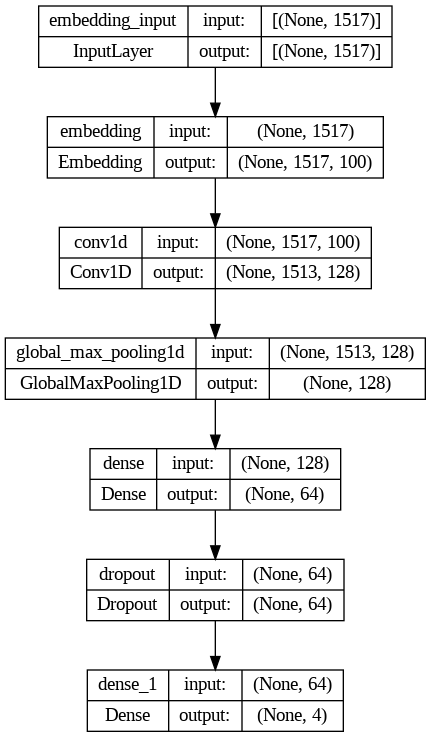

In [10]:
# Plot model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True)

**Early stopping**

In [11]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)


**Train the model**

In [12]:
# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
605/605 [==============================] - 60s 91ms/step - loss: 0.1950 - accuracy: 0.9348 - val_loss: 0.0783 - val_accuracy: 0.9707
Epoch 2/20
605/605 [==============================] - 35s 58ms/step - loss: 0.0277 - accuracy: 0.9928 - val_loss: 0.0888 - val_accuracy: 0.9660
Epoch 3/20
605/605 [==============================] - 33s 55ms/step - loss: 0.0087 - accuracy: 0.9979 - val_loss: 0.1342 - val_accuracy: 0.9489
Epoch 4/20
605/605 [==============================] - 32s 54ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.1182 - val_accuracy: 0.9582


**Evaluate the model**

In [13]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
rounded_accuracy = round(accuracy, 4)
print("Test Accuracy:", rounded_accuracy*100)


756/756 [==============================] - 5s 6ms/step - loss: nan - accuracy: 0.9593
Test Accuracy: 95.93


**code for input url type prediction**

In [14]:
# Function to predict the type of URL
def predict_url_type(url):
    # Tokenize and pad the input URL
    encoded_url = tokenizer.texts_to_sequences([url])
    padded_url = pad_sequences(encoded_url, maxlen=max_len)
    # Make predictions
    prediction = model.predict(padded_url)
    # Decode the prediction
    label_index = np.argmax(prediction)
    label = label_encoder.inverse_transform([label_index])[0]
    return label

**printing url type**

In [20]:
# Test the model with user input
user_input = input("Enter a URL: ")
prediction = predict_url_type(user_input)
print("Predicted URL Type:", prediction)


Enter a URL: http://www.hollingstedt.de/hollingstedt/geschichte/209-250-jahre-friedrichsfeld.html
1/1 [==============================] - 0s 17ms/step
Predicted URL Type: defacement
